In [65]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [66]:
training = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
data=pd.read_csv('/kaggle/input/titanic/train.csv')

training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training,test])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

**Visualizing the Data**
I used the amazing data rep by https://www.kaggle.com/code/hardikarora24/titanic0




<Axes: ylabel='Survived'>

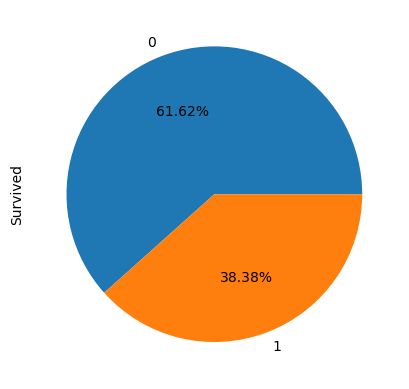

In [67]:
training.Survived.value_counts().plot.pie(autopct='%1.2f%%')

<Axes: xlabel='Sex', ylabel='count'>

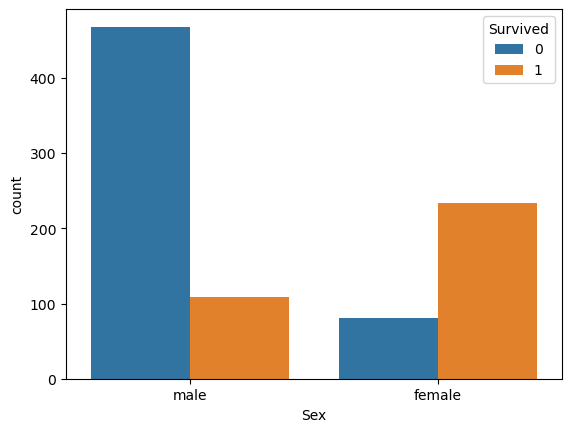

In [68]:
sb.countplot(training, x = 'Sex', hue = 'Survived')

<Axes: xlabel='Embarked', ylabel='count'>

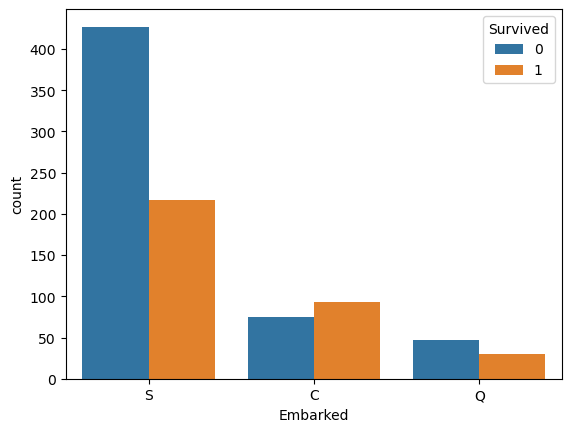

In [69]:
sb.countplot(training, x = 'Embarked', hue='Survived')

<Axes: xlabel='Survived', ylabel='count'>

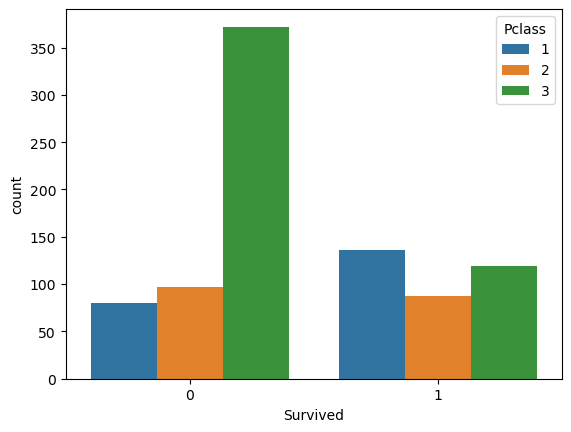

In [70]:
sb.countplot(training, x = 'Survived', hue = 'Pclass')

In [71]:
pd.crosstab(training.Pclass,training.Survived,margins=True).style.background_gradient(cmap='cool')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Parch', ylabel='count'>

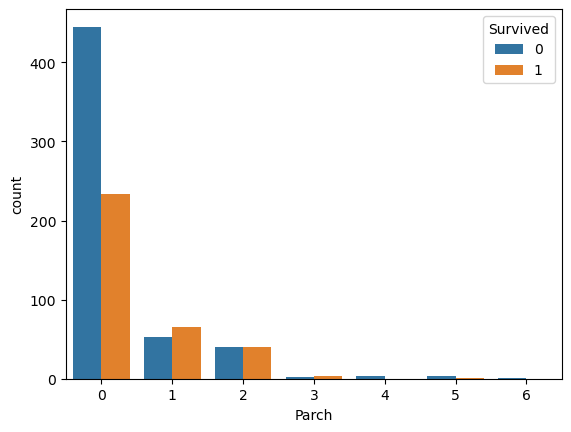

In [72]:
sb.countplot(training, x = 'Parch', hue = 'Survived')

<Axes: xlabel='SibSp', ylabel='count'>

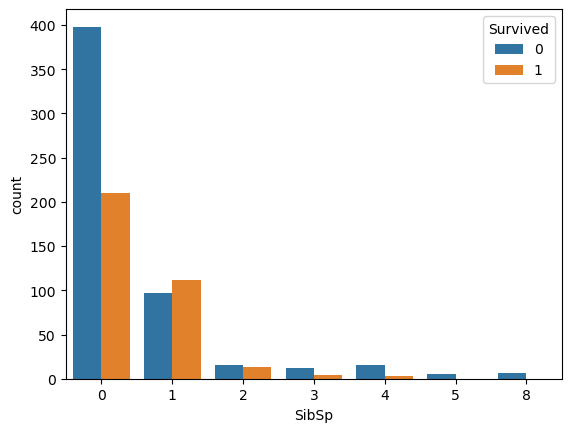

In [73]:
sb.countplot(training, x = 'SibSp', hue = 'Survived')

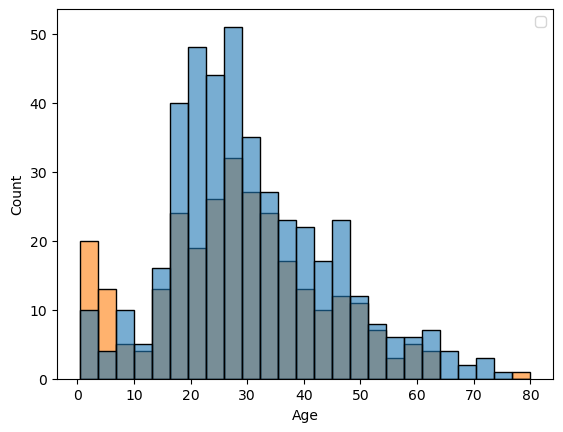

In [74]:
sb.histplot(training, x='Age', hue='Survived', alpha=0.6, bins=25)
plt.legend()
plt.show()

KeyboardInterrupt: 

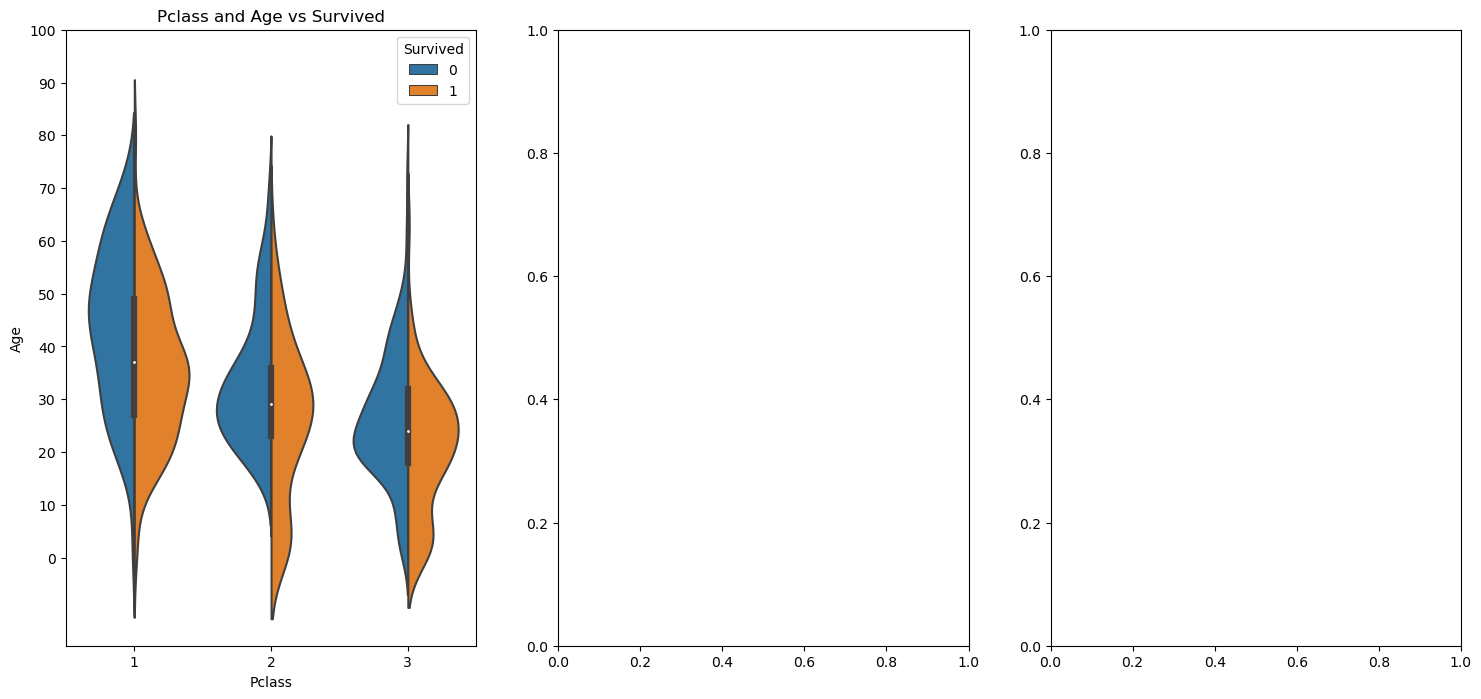

In [75]:
f,ax=plt.subplots(1,3,figsize=(18,8))
sb.violinplot(x="Pclass",y="Age", hue="Survived", data=training,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sb.violinplot(x="Sex",y="Age", hue="Survived", data=training,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
sb.violinplot(x="Embarked",y="Age", hue="Survived", data=training,split=True,ax=ax[2])
ax[2].set_title('Embarked and Age vs Survived')
ax[2].set_yticks(range(0,110,10))
plt.show()

In [ ]:
training.head()

In [ ]:
training.describe()

In [ ]:
training.describe()

In [ ]:
training['Died']=1- training['Survived']
training.groupby('Sex')[['Survived','Died']].sum().plot(kind='bar',figsize=(30, 7))

**Project Planning:**

For successfull Machine Learning, Data processing is a vital part of the project. Giving the model good data to work with will be the first major step.
Firstly, cleaning up the data and then doing some feature engineering


Firstly let's look at possible categories to lump together
(I lost my progess of my first day of work due to Kaggle not saving my notebook, hence I will recap what I did but not go into as much detail)


In [ ]:
print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print('---------------------------------')
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print('---------------------------------')
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))
training['CabinComb'] = training.Cabin.apply(lambda x: str(x)[0])
print('---------------------------------')
print(training.CabinComb.value_counts())
pd.pivot_table(training,index='Survived',columns='CabinComb', values = 'Name', aggfunc='count')
print('---------------------------------')

i = 0
j = 0
train = training.sort_values(by='Cabin')
while i <= 195:
    j = i
    i += 15
    train['Cabin' + str(i)] = train['Cabin'].iloc[j:i]
    print(pd.pivot_table(train,index='Survived',columns='Cabin' + str(i), values = 'Name', aggfunc='count'))
    print('---------------------------------')


def extract_cabin_num(cabin):
    if isinstance(cabin, str):
        cabin_num = cabin.split()[0][1:]  
        if cabin_num.isdigit():
            return int(cabin_num)
    return None

def categorize_cabin_smaller_33(cabin_num):
    if cabin_num is not None and cabin_num < 33:
        return 'Yes'
    return 'No'

def categorize_cabin_33_66(cabin_num):
    if cabin_num is not None and 33 <= cabin_num <= 66:
        return 'Yes'
    return 'No'

def categorize_cabin_bigger_66(cabin_num):
    if cabin_num is not None and cabin_num > 66:
        return 'Yes'
    return 'No'

training['CabinNum'] = training['Cabin'].map(extract_cabin_num)

training['Cabin_0_33'] = training['CabinNum'].map(categorize_cabin_smaller_33)
training['Cabin_33_66'] = training['CabinNum'].map(categorize_cabin_33_66)
training['Cabin_66'] = training['CabinNum'].map(categorize_cabin_bigger_66)


print(pd.pivot_table(training,index='Survived',columns='Cabin_0_33', values = 'Name', aggfunc='count'))
print('---------------------------------')
print(pd.pivot_table(training,index='Survived',columns='Cabin_33_66', values = 'Name', aggfunc='count'))
print('---------------------------------')
print(pd.pivot_table(training,index='Survived',columns='Cabin_66', values = 'Name', aggfunc='count'))
print('---------------------------------')

Now let's look for some notable trends in the rooms by number


In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sb.violinplot(x="CabinComb",y="CabinNum", hue="Survived", data=training,split=True,ax=ax[0])
ax[0].set_title('Cabin_0_33 and Age vs Survived')
ax[0].set_yticks(range(0,150,20))

sb.violinplot(x="Cabin_0_33",y="CabinNum", hue="Survived", data=training,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
#ax[1].set_yticks(range(0,110,10))

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sb.violinplot(x="Cabin_33_66",y="CabinNum", hue="Survived", data=training,split=True,ax=ax[0])
ax[0].set_title('Cabin_0_33 and Age vs Survived')
ax[0].set_yticks(range(0,150,20))

sb.violinplot(x="Cabin_66",y="CabinNum", hue="Survived", data=training,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
#ax[1].set_yticks(range(0,110,10))

In [ ]:
'''def extract_cabin_char(cabin):
    if isinstance(cabin, str):
        cabin_char = cabin[0]
        if cabin_char.isstring():
            return str(cabin_char)
    return None

def extract_danger_zone_E(cabin):
    if cabin_char == 'E':
        if cabin_num is not None and cabin_num > 40:
            if cabin_num < 80:
                return 'Yes'
    return 'No' '''
    
#training['cabin_char'] = training['Cabin'].map(extract_cabin_char)
#training['Danger_Zone_E'] = training['Cabin'].map(extract_danger_zone_E)

Cabins sharing a letter can be combined as they share similar postions on the ship like a level. Further I tried finding a conncection between the numbers. For example if having a low number (like < 33 as an arbitrary example I picked) would represent being closer to an exit and thus maybe a lifeboat was an indication of survival.
It turns out, cabin numbers between E25 and E75 had a particularly low chance of survival.

In [ ]:
training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
training['numeric_ticket'].value_counts()
training['ticket_letters'].value_counts()
print(pd.pivot_table(training,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count'))
print(pd.pivot_table(training,index='Survived',columns='ticket_letters', values = 'Ticket', aggfunc='count'))

I also thought the tickets having a number or not would give some information, like being the cabins of special passengers who may have a particularly good/bad postion on the ship. Because of losing my code I used https://www.kaggle.com/code/kenjee/titanic-project-example 's lambda function for the ticket letters.
I wasn't sure however if I could combine certain special ticket types so I decided against it for the moment.


Next I was interested in weather the titles of the passengers would make a difference, like "nobles" being put together if they all died or suvived no matter their individual title or women being put together. 

It turns out that 'nobles' (men and women) actually had a survival rate higher their non-noble counterparts, especially for men.

For women, their marital status plays a role int their survival rate. Unmarried women (Miss, Mlle, Mme) having a lower surival rate than married ones (Mrs) so I decided to combine them based on that.  

In [ ]:
training['title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
training['title'].value_counts()


print(pd.pivot_table(training,index='Survived',columns='title', values = 'Ticket', aggfunc='count'))

#training['unmarried_women'] = training['Miss'].combine_first(training['Mlle'])
#training['married_women'] = 

In [ ]:
training.head()

In [ ]:
#training['title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
training.head()

In [ ]:

#training['Miss'] = training['title'].apply(lambda x: 'Yes' if x == 'Miss' else 'No')
#training['Mlle'] = training['title'].apply(lambda x: 'Yes' if x == 'Mlle' else 'No')
title_dummies = pd.get_dummies(training['title'])

'''training_dummies = pd.concat([training, title_dummies], axis=1)
#training['unmarried_women'] = training['Miss'].combine_first(training['Mlle'])
#training['unmarried_women'] = training['title'].apply(lambda x: 'unmarried_women' if x in ['Miss', 'Mlle'] else 'No')
training['title'] = training_dummies['title'].replace(['Miss', 'Mlle'], 'unmarried_women')
training['title'] = training_dummies['title'].replace(['Mme', 'Mrs'], 'married_women')
training['title'] = training_dummies['title'].replace(['Master', 'Col', 'Sir', 'Major', 'Jonkheer'], 'noblemen')
training['title'] = training_dummies['title'].replace(['the Countess', 'Lady'], 'noblewomen')
training['title'] = training_dummies['title'].replace(['Mr', 'Don'], 'men')'''

training['title'] = training['title'].replace(['Miss', 'Mlle'], 'unmarried_women')
training['title'] = training['title'].replace(['Mme', 'Mrs'], 'married_women')
training['title'] = training['title'].replace(['Master', 'Col', 'Sir', 'Major', 'Jonkheer'], 'noblemen')
training['title'] = training['title'].replace(['the Countess', 'Lady'], 'noblewomen')
training['title'] = training['title'].replace(['Mr', 'Don'], 'men')

# Calculate survival rates based on the assigned titles
survival_rates = training.groupby('title')['Survived'].mean().reset_index()

plt.figure(figsize=(10, 6))

# Plot the survival rates using Seaborn
sb.barplot(data=survival_rates, x='title', y='Survived')
plt.xlabel('Title')
plt.ylabel('Survival Rate')
plt.title('Survival Rates by Title')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()
#training['unmarried_women'].value_counts()

In [ ]:
training.head()

In [ ]:
excluded_title = 'men'
filtered_data = training[training['title'] != excluded_title]
title_pclass_counts = filtered_data.groupby(['title', 'Pclass']).size().reset_index(name='Count')

# Set the figure size
plt.figure(figsize=(10, 6))
sb.barplot(data=title_pclass_counts, x='title', y='Count', hue='Pclass')
plt.xlabel('Title')
plt.ylabel('Count')
plt.title('Number of People in Each Pclass by Title')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Pclass')
plt.show()

In [ ]:
import math
title_pclass_counts = filtered_data.groupby(['title', 'Pclass']).size().reset_index(name='Count')
plt.figure(figsize=(12, 8))

# Get the unique titles
titles = title_pclass_counts['title'].unique()

# Count the number of people in each title-Pclass combination
title_pclass_counts = training.groupby(['title', 'Pclass']).size().reset_index(name='Count')

# Set the figure size
plt.figure(figsize=(12, 8))

# Get the unique titles
titles = title_pclass_counts['title'].unique()

num_titles = len(titles)
num_cols = 3
num_rows = math.ceil(num_titles / num_cols)

# Set the figure size
plt.figure(figsize=(12, 4 * num_rows))

# Create a pie chart for each title
for i, title in enumerate(titles):
    data = title_pclass_counts[title_pclass_counts['title'] == title]
    sizes = data['Count']
    labels = data['Pclass']

    ax = plt.subplot(num_rows, num_cols, i + 1)
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    ax.set_title(f'{title} - Pclass Distribution')

plt.tight_layout()
plt.show()

In [ ]:
survival_rate = training.groupby(['Pclass', 'title']).Survived.mean().reset_index()
plt.figure(figsize=(12, 8))

# Create a stacked bar chart
sb.barplot(data=survival_rate, x='Pclass', y='Survived', hue='title')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Pclass and Title')

plt.legend(title='Title', loc='best')
plt.show()

In [ ]:
k = pd.read_csv('/kaggle/input/titanic/train.csv')
train_see = k
train_see['CabinNum'] = train_see['Cabin'].map(extract_cabin_num)
train_see['numeric_ticket'] = train_see.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train_see['ticket_letters'] = train_see.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
train_see.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
corr_matrix = train_see.corr()

plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#create all categorical variables that we did above for both training and test sets
training = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

training['train_test'] = 1
test['train_test'] = 0

all_data = pd.concat([training,test])

all_data['CabinNum'] = all_data['Cabin'].map(extract_cabin_num)
all_data['CabinChar'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

all_data['CabinNum'] = all_data['Cabin'].map(extract_cabin_num)

all_data['Cabin_Lo'] = all_data['CabinNum'].map(categorize_cabin_smaller_33)
all_data['Cabin_Mid'] = all_data['CabinNum'].map(categorize_cabin_33_66)
all_data['Cabin_Up'] = all_data['CabinNum'].map(categorize_cabin_bigger_66)

all_data['title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
all_data_dummies = pd.get_dummies(all_data['title'])
all_data_dummies = pd.concat([training, title_dummies], axis=1)
all_data['title'] = all_data['title'].replace(['Miss', 'Mlle'], 'unmarried_women')
all_data['title'] = all_data['title'].replace(['Mme', 'Mrs'], 'married_women')
all_data['title'] = all_data['title'].replace(['Master', 'Col', 'Sir', 'Major', 'Jonkheer'], 'noblemen')
all_data['title'] = all_data['title'].replace(['the Countess', 'Lady'], 'noblewomen')
all_data['title'] = all_data['title'].replace(['Mr', 'Don'], 'men')

#impute nulls for continuous data 
#all_data.Age = all_data.Age.fillna(training.Age.mean())
all_data.Age = all_data.Age.fillna(all_data.Age.median())
#all_data.Fare = all_data.Fare.fillna(training.Fare.mean())
all_data.Fare = all_data.Fare.fillna(all_data.Fare.median())

#drop null 'embarked' rows. Only 2 instances of this in training and 0 in test 
all_data.dropna(subset=['Embarked'],inplace = True)
all_data.dropna(subset=['CabinNum'],inplace = True)

#tried log norm of sibsp (not used)
#all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
#all_data['norm_sibsp'].hist()

# log norm of fare (used)
all_data['norm_fare'] = np.log(training.Fare+1)
all_data['norm_fare'].hist()

# converted fare to category for pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)

#created dummy variables from categories (also can use OneHotEncoder)
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','CabinNum',
                                    'norm_fare','Embarked','CabinChar','numeric_ticket','title',
                                    'Cabin_Lo', 'Cabin_Mid', 'Cabin_Up', 'train_test']])

#Split to train test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)


y_train = all_data[all_data.train_test==1].Survived
y_train.shape

X_train.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
 gnb = GaussianNB()
cv = cross_val_score(gnb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

In [ ]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

In [ ]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=7)
print(cv)
print(cv.mean())

In [ ]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=7)
print(cv)
print(cv.mean())

a

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('dt',dt),('gnb',gnb),('svc',svc)], voting = 'soft') 
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

In [ ]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [ ]:
lr = LogisticRegression()
param_grid = {'max_iter' : [1500],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

'''clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled,y_train)
clf_performance(best_clf_lr,'Logistic Regression')'''

Best Parameters: {'C': 0.615848211066026, 'max_iter': 1500, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
'''clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled,y_train)
clf_performance(best_clf_svc,'SVC')'''

Best Parameters: {'C': 0.1, 'kernel': 'linear'}

In [ ]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['sqrt', 10], #auto doesn't work here for unknown reasons
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
'''clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf,'Random Forest')'''

Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 550}

In [ ]:
'''best_rf = best_clf_rf.best_estimator_.fit(X_train_scaled,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')'''

In [ ]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
'''clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scaled,y_train)
clf_performance(best_clf_knn,'KNN')'''

In [ ]:
import keras 
from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense      # create layers
model = Sequential()

# layers
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 35))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
model.fit(X_train, y_train, batch_size = 32, epochs = 200)

In [ ]:
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
#from sklearn.model_selection import KFold
'''
ntrain = train.shape[0]
ntest = test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
#kf = KFold(ntrain, n_folds= NFOLDS, random_state=SEED)
kf = KFold(NFOLDS)

class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)'''

In [ ]:
'''lr_params = {'n_jobs': -1,
             'C': 0.615848211066026, 
             'max_iter': 1500, 
             'penalty': 'l1', 
             'solver': 'liblinear'
            }
lr = LogisticRegression(**lr_params)

lr.fit(X_train,y_train)

lr_best = lr.best_estimator_

lr.best_score_'''

'''rf_params = {
    'n_jobs': -1,
    'n_estimators': 550,
     'warm_start': True,
    'max_depth': 15,
    'min_samples_leaf': 2,
    'min_samples_split': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}
rf = RandomForestClassifier(**rf_params)
rf.fit(X_train,y_train)

rf_best = rf.best_estimator_

rf.best_score_

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

et.fit(X_train,y_train)

et_best = et.best_estimator_

et.best_score_

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

ada.fit(X_train,y_train)

ada_best = ada.best_estimator_

ada.best_score_

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

gb.fit(X_train,y_train)
gb_best = gb.best_estimator_
gb.best_score_

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.1
    }
svc.fit(X_train,y_train)

svc_best = svc.best_estimator_

svc.best_score_


test_Survived_RF = pd.Series(RFC_best.predict(test), name="rf")
test_Survived_LR = pd.Series(ExtC_best.predict(test), name="lr")
test_Survived_SVC = pd.Series(SVMC_best.predict(test), name="svc")
test_Survived_ADA = pd.Series(ada_best.predict(test), name="ada")
test_Survived_GB = pd.Series(GBC_best.predict(test), name="gb")
est_Survived_ET = pd.Series(GBC_best.predict(test), name="et")


votingC = VotingClassifier(estimators=[('lr', lr_best) ('rf', rf_best), ('svc', svc_best),
('gb', gb_best), ('ada',ada_best),('et',et_best), ('model')], voting='soft', n_jobs= -1)

votingC = votingC.fit(X_train, Y_train)'''

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

kfold = StratifiedKFold(n_splits=10)

'''neural_network = MLPClassifier()
nn_param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 25)],  # Specify different architectures
    'activation': ['relu', 'tanh'],  # Activation functions to try
    'solver': ['adam', 'sgd'],  # Optimization algorithms
    'alpha': [0.0001, 0.001, 0.01],  # Regularization parameter
    'max_iter': [100, 200, 400], 
    'learning_rate' : [0.001, 0.005, 0.01],
}

gsNN = GridSearchCV(neural_network, param_grid=nn_param_grid, cv=kfold, scoring="accuracy", n_jobs=-1, verbose=1)
gsNN.fit(X_train, y_train)

NN_best = gsNN.best_estimator_'''

DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"estimator__criterion" : ["gini", "entropy"],
              "estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsadaDTC.fit(X_train,y_train)

ada_best = gsadaDTC.best_estimator_

gsadaDTC.best_score_

ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsExtC.fit(X_train,y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["log_loss"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsSVMC.fit(X_train,y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_


#test_Survived_NN = pd.Series(NN_best.predict(X_test), name="nn")
test_Survived_RFC = pd.Series(RFC_best.predict(X_test), name="rf")
test_Survived_ExtC = pd.Series(ExtC_best.predict(X_test), name="et")
test_Survived_SVMC = pd.Series(SVMC_best.predict(X_test), name="svc")
test_Survived_AdaC = pd.Series(ada_best.predict(X_test), name="ada")
test_Survived_GBC = pd.Series(GBC_best.predict(X_test), name="gb")

votingC = VotingClassifier(estimators=[('rf', RFC_best), ('et', ExtC_best),
('svc', SVMC_best), ('ada',ada_best),('gb',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, y_train)

In [ ]:
test_Survived = pd.Series(votingC.predict(X_test), name="Survived")
print(test_Survived.mean())

In [ ]:
final_data = {'PassengerId': test.PassengerId, 'Survived': test_Survived}
submission = pd.DataFrame(data=final_data)
submission.to_csv('submission.csv', index =False)

In [ ]:
'''test = pd.read_csv('/kaggle/input/titanic/test.csv')
test.head()
passenger_ids = test['PassengerID']
X_test_sub = pd.concat([passenger_ids, X_test], axis=1)

test_Survived = pd.Series(votingC.predict(X_test_sub), name="Survived")
IDtest = X_test_sub["PassengerId"]
results = pd.concat([IDtest,test_Survived],axis=1)

results.to_csv("submission.csv",index=False)'''

In [ ]:
'''def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

et_oof_train, et_oof_test = get_oof(et, X_train, y_train, X_test) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf,X_train, y_train, X_test) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, X_train, y_train, X_test) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gb,X_train, y_train, X_test) # Gradient Boost
svc_oof_train, svc_oof_test = get_oof(svc,X_train, y_train, X_test) # Support Vector Classifier
nn_oog_train, nn_oof_test = get_oof(model,X_train, y_train, X_test) # NN Classifier'''

From doing some testing myself and looking at what GMs are doing, certain trends became apparent:
generally, the same tried and true models are used, their parameters tuned in a similar way, even for models with dozens of tune-able parameters, and ensenmbled using one of the few options. 

certain optimal parmeters need to be found either through grid or random search, there seems to be a consensus among GMs that one should do grid search. This is what I could gather for some models:
It is worth noting that I couldn't find out yet weather or not this is something general across all competitions or not.

Extra Trees:
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

Random Forrest:
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

GB classifiers:
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

SVM:
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

Sometimes, instead of searching parameters with grid or random search, Out Of Fold is used to get the most important features 

et_oof_train, et_oof_test = get_oof(et, x_train, y_train, x_test) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf,x_train, y_train, x_test) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, x_train, y_train, x_test) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gb,x_train, y_train, x_test) # Gradient Boost
svc_oof_train, svc_oof_test = get_oof(svc,x_train, y_train, x_test) # Support Vector Classifier


and then use stacking like:
base_predictions_train = pd.DataFrame( {'RandomForest': rf_oof_train.ravel(),
     'ExtraTrees': et_oof_train.ravel(),
     'AdaBoost': ada_oof_train.ravel(),
      'GradientBoost': gb_oof_train.ravel()
    })
base_predictions_train.head()

as a first level model. As one GM noted and what I could also see, is in his words: "There have been quite a few articles and Kaggle competition winner stories about the merits of having trained models that are more uncorrelated with one another producing better scores." -ANISOTROPIC

as second level learning, the XGBoost Library is then used, apparently to great effect.

From my study of GMs and their techniques, there is a certain consensus, either through a sort of "industry standard" or "competition standard" way or through a lot of hidden expertise among GMs of tuning HPs and which one's to pick.
Because AutoML tools are meant to be used by novices or people who lack experience with ML altogether, I think tools need to be included in AutoML Libraries for the user to find this out more easily than trial and error, which for larger models and datasets takes a lot of time.

Further it seems that Ensembling is a vital part, one might even say at the heart of most final submissions by GMs. But here, which ensembling method to pick seems to matter to GMs a whole lot and they are particular from the outset which one to pick. Again through a hidden expertise a novice is lacking, AutoML libraries should find a way to tackle this.

Lastly, a more rare use in Kaggle, or at least Titanic, but certainly another vital tool in every ML engineers arsenal is the Neural network. For which suprisingly little existing easy architecture exists. The existing one having a high barrier to entry, again not suitable for a novice. Further as my personal idea, an easy way to visualize the NN one has constructed without having to get super familiar with something like pandas and using it for a different purpose than it was intended for.

**Feature Engineering**


In [ ]:
'''test['CabinNum'] = test['Cabin'].map(extract_cabin_num)
test['numeric_ticket'] = test.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
test['ticket_letters'] = test.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
test['title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
title_dummies = pd.get_dummies(test['title'])
test_dummies = pd.concat([training, title_dummies], axis=1)
test['title'] = test_dummies['title'].replace(['Miss', 'Mlle'], 'unmarried_women')
test['title'] = test_dummies['title'].replace(['Mme', 'Mrs'], 'married_women')
test['title'] = test_dummies['title'].replace(['Master', 'Col', 'Sir', 'Major', 'Jonkheer'], 'noblemen')
test['title'] = test_dummies['title'].replace(['the Countess', 'Lady'], 'noblewomen')
test['title'] = test_dummies['title'].replace(['Mr', 'Don'], 'men')

title_dummies = pd.get_dummies(test['title'])
test_dummies = pd.concat([test, title_dummies], axis=1)
test['title'] = test_dummies['title'].replace(['Miss', 'Mlle'], 'unmarried_women')
test['title'] = test['title'].replace(['Mme', 'Mrs'], 'married_women')
test['title'] = test['title'].replace(['Master', 'Col', 'Sir', 'Major', 'Jonkheer'], 'noblemen')
test['title'] = test['title'].replace(['the Countess', 'Lady'], 'noblewomen')
test['title'] = test['title'].replace(['Mr', 'Don'], 'men')
'''

In [ ]:
#data.head()

In [ ]:
'''from sklearn.model_selection import train_test_split

X = training.drop('Survived', axis = 1)
#X = data
Y = training['Survived']
#Y = data

X_training, X_test, Y_training, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_training[['Age']] = scaler.fit_transform(X_training[['Age']])
X_test[['Age']] = scaler.fit_transform(X_test[['Age']])

X_training[['Fare']] = scaler.fit_transform(X_training[['Fare']])
X_test[['Fare']] = scaler.fit_transform(X_test[['Fare']])

X_training[['Pclass']] = scaler.fit_transform(X_training[['Pclass']])
X_test[['Pclass']] = scaler.fit_transform(X_test[['Pclass']])

X_training[['SibSp']] = scaler.fit_transform(X_training[['SibSp']])
X_test[['SibSp']] = scaler.fit_transform(X_test[['SibSp']])

X_training[['Parch']] = scaler.fit_transform(X_training[['Parch']])
X_test[['Parch']] = scaler.fit_transform(X_test[['Parch']])

X_test.drop(['Sex', 'Fare'], axis = 1, inplace = True)
#X_test.drop('Sex_male', axis = 1, inplace = True)

X_test.head(5)'''

'''from sklearn.model_selection import train_test_split

X = training.drop('Survived', axis = 1)
Y = training['Survived']
X = training.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Parch'], axis = 1, inplace = True)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)'''

):